# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
import numpy as np
np.random.seed(5)
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
estimates_model = [(KMeans(n_clusters=6)), (KMeans(n_clusters=3)), 
                   (KMeans(n_clusters=3, n_init=1, init='random'))]

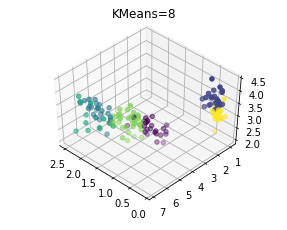

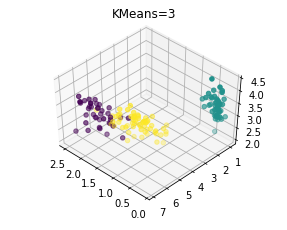

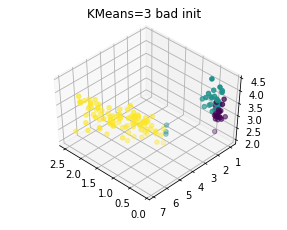

In [4]:
fig_num = 1
title = ['KMeans=8', 'KMeans=3', 'KMeans=3 bad init']
for model in estimates_model:
    fig = plt.figure(num=fig_num, figsize=(4,3))   # 建立一個4x3的圖框
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    
    model.fit(X)
    labels = model.labels_    # 預測的分群結果
    
    ax.scatter(X[:, 3], X[:, 2], X[:, 1], c=labels.astype(np.float))
    ax.set_title(title[fig_num - 1])
    ax.dist = 12
    fig_num = fig_num + 1
    
    

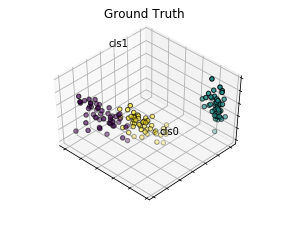

In [5]:
# Plot the ground truth
fig = plt.figure(fig_num, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 2], X[:, 1], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()